
Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2),virus closely related to the SARS virus.

The virus first emerged in Wuhan, Hubei, China and is the cause of the 2019–20 coronavirus pandemic.

While the majority of cases result in mild symptoms,some progress to pneumonia and multi-organ failure.

The infection is spread from one person to others via respiratory droplets produced from the airways, often during coughing. Hand washing, maintaining distance from other people, and not touching one's face with unwashed hands are measures recommended to prevent the disease.It is also recommended to cover one's nose and mouth with a tissue or a bent elbow when coughing.

Masks are recommended for those who suspect they have the virus and for those who are taking care of someone with a suspected infection, but they are not recommended for the general public.

There is no vaccine or specific antiviral treatment.Management involves treatment of symptoms, supportive care, and experimental measures.

Source: https://en.wikipedia.org/wiki/Coronavirus_disease_2019

In this Notebook,we shall try to use various visualization Techniques to find out inferences about the pandemic.



**Please,visit this [link](https://www.iban.com/country-codes) to identify countries through ISO2 and ISO3 country naming convention which has been used in this notebook to avoid any confusion. **

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/covid19-uk-dataset/DailyConfirmedCases.xlsx
/kaggle/input/covid19-uk-dataset/DailyIndicators (1).xlsx
/kaggle/input/covid19-uk-dataset/CountyUAs_cases_table.csv
/kaggle/input/covid19-uk-dataset/CountyUAs_cases_table (1).csv
/kaggle/input/covid19-uk-dataset/DailyIndicators.xlsx
/kaggle/input/covid19-uk-dataset/DailyConfirmedCases (2).xlsx
/kaggle/input/covid19-uk-dataset/NHSR_Cases_table.csv
/kaggle/input/covid19-uk-dataset/NHSR_Cases_table (1).csv
/kaggle/input/covid19-in-usa/us_covid19_daily.csv
/kaggle/input/covid19-in-usa/us_st

**Loading appropriate Packages and Data Preprocessing.**

In [2]:
!pip install pycountry-convert
!pip install country_converter --upgrade


     |████████████████████████████████| 45 kB 1.4 MB/s 
  Created wheel for country-converter: filename=country_converter-0.6.7-py3-none-any.whl size=50215 sha256=7faf6a2664c90f3ea95288faee422e547d086a61f81b96272eccccb7c662c13b
  Stored in directory: /root/.cache/pip/wheels/c3/14/c5/643f9ed1d6335a90d70009ea68691f6bf65a3ad6b9e5d2aa3f
Successfully built country-converter


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import pycountry
import pycountry_convert as pc
import plotly.graph_objects as go
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import Phylo
from Bio.SeqUtils import GC
from functools import lru_cache
import warnings
warnings.filterwarnings('ignore')
from Bio.SeqUtils import GC_skew,molecular_weight
import pylab
import country_converter as coco
from plotly.subplots import make_subplots


In [4]:
import pandas as pd
covid_clean = pd.read_csv("../input/corona-virus-report/covid_19_clean_complete.csv",parse_dates=['Date'])

us_covid19_daily = pd.read_csv("../input/covid19-in-usa/us_covid19_daily.csv")
us_states_covid19_daily = pd.read_csv("../input/covid19-in-usa/us_states_covid19_daily.csv")


In [5]:
covid_clean['Active'] = covid_clean['Confirmed'] - covid_clean['Deaths'] - covid_clean['Recovered']

covid_clean['Country/Region'] = covid_clean['Country/Region'].replace('Mainland China', 'China')

covid_clean[['Province/State']] = covid_clean[['Province/State']].fillna('unknown')
covid_ship =covid_clean[covid_clean['Province/State'].str.contains('Grand Princess')|covid_clean['Province/State'].str.contains('Diamond Princess cruise ship')]


In [6]:

@lru_cache(maxsize=None)
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_2
    except:
        return np.nan

covid_clean['country_code'] = covid_clean["Country/Region"].apply(lambda country: do_fuzzy_search(country))

In [7]:
covid_clean["country_code"] = covid_clean.apply(lambda row:"TW" if row['Country/Region'] == 'Taipei and environs'   else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"IR" if row['Country/Region'] == 'Iran (Islamic Republic of)' else row['country_code'],axis = 1) 
covid_clean["country_code"] = covid_clean.apply(lambda row:"PS" if row['Country/Region'] == 'occupied Palestinian territory' else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"GB" if row['Country/Region'] == 'Channel Islands' else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"TW" if row['Country/Region'] == 'Taiwan*'  else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"KR" if row['Country/Region'] == 'Korea, South'  else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"CD" if row['Country/Region'] == 'Congo (Kinshasa)'  else row['country_code'],axis = 1)
covid_clean["country_code"] = covid_clean.apply(lambda row:"CD" if row['Country/Region'] == 'Congo (Brazzaville)'   else row['country_code'],axis = 1)

In [8]:
@lru_cache(maxsize=None)
def do_continent_search(alpha2):
    try:
        result = pc.country_alpha2_to_continent_code(alpha2)
        return result
    except Exception:
        return np.nan
covid_clean['continent'] = covid_clean["country_code"].apply(lambda x: do_continent_search(x))
covid_clean["continent"] = covid_clean.apply(lambda row:"EU" if row['country_code'] == 'VA'   else row['continent'],axis = 1)



In [9]:
@lru_cache(maxsize=None)
def country(alpha2):
    try:
        result =coco.convert(names=alpha2, to='name_short',not_found = np.NaN)
        return result
    except Exception:
        return np.nan


In [10]:
covid_clean['Country/Region'] = covid_clean['country_code'].apply(lambda x:country(x))

**Clean dataset with ISO2 country names and continent names**

**Visualizations**

In [11]:
latest_data = covid_clean[covid_clean["Date"] == max(covid_clean["Date"])].reset_index()
country_latest_data = latest_data.groupby('Country/Region').sum().reset_index().sort_values(by = 'Confirmed',ascending = False).head(5)
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=country_latest_data["Country/Region"], y=country_latest_data['Confirmed'],marker_color = 'rgb(55, 83, 109)'),
    go.Bar(name='Active', x=country_latest_data["Country/Region"], y=country_latest_data['Active'],marker_color = 'lightsalmon'),
    go.Bar(name = 'Revovered',x=country_latest_data["Country/Region"],y=country_latest_data['Recovered'],marker_color = 'green' ),
    go.Bar(name = 'Deaths',x=country_latest_data["Country/Region"],y=country_latest_data['Deaths'],marker_color = 'crimson' ),
    
])
fig.update_layout(barmode='group',title_text ='Top 5 countries ')
fig.layout.template ='plotly_dark'
fig.show()

In [12]:
latest_data = covid_clean[covid_clean["Date"] == max(covid_clean["Date"])].reset_index()
country_latest_data = latest_data.groupby('Country/Region').sum().reset_index()
countries_confirmed_cases = country_latest_data[country_latest_data['Confirmed']>1000].reset_index().sort_values(by = 'Confirmed',ascending = False)
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=countries_confirmed_cases["Country/Region"], y=countries_confirmed_cases['Confirmed'],marker_color = 'rgb(55, 83, 109)'),
    go.Bar(name='Active', x=countries_confirmed_cases["Country/Region"], y=countries_confirmed_cases['Active'],marker_color = 'lightsalmon'),
    go.Bar(name = 'Revovered',x=countries_confirmed_cases["Country/Region"],y=countries_confirmed_cases['Recovered'],marker_color = 'green' ),
    go.Bar(name = 'Deaths',x=countries_confirmed_cases["Country/Region"],y=countries_confirmed_cases['Deaths'],marker_color = 'crimson' ),
    
])
fig.update_layout(barmode='group',title_text ='Countries(confirmed>1000)')
fig.layout.template ='plotly_dark'
fig.show()

In [13]:
latest_data = covid_clean[covid_clean["Date"] == max(covid_clean["Date"])].reset_index()
country_latest_data = latest_data.groupby('Country/Region').sum().reset_index()
countries_confirmed_cases = country_latest_data[(country_latest_data['Confirmed']<1000)&(country_latest_data['Confirmed']>100)].reset_index().sort_values(by = 'Confirmed',ascending = False)
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=countries_confirmed_cases["Country/Region"], y=countries_confirmed_cases['Confirmed'],marker_color = 'rgb(55, 83, 109)'),
    go.Bar(name='Active', x=countries_confirmed_cases["Country/Region"], y=countries_confirmed_cases['Active'],marker_color = 'lightsalmon'),
    go.Bar(name = 'Revovered',x=countries_confirmed_cases["Country/Region"],y=countries_confirmed_cases['Recovered'],marker_color = 'green' ),
    go.Bar(name = 'Deaths',x=countries_confirmed_cases["Country/Region"],y=countries_confirmed_cases['Deaths'],marker_color = 'crimson' ),
    
])
fig.update_layout(barmode='group',title_text ='Deaths vs Confirmed Cases(confirmed between 1000 and 100)')
fig.layout.template ='plotly_dark'
fig.show()

In [14]:
latest_data = covid_clean[covid_clean["Date"] == max(covid_clean["Date"])].reset_index()
country_latest_data = latest_data.groupby('Country/Region').sum().reset_index()
countries_confirmed_cases = country_latest_data[(country_latest_data['Confirmed']<100)&(country_latest_data['Confirmed']>10)].reset_index().sort_values(by = 'Confirmed',ascending = False)
fig = go.Figure(data=[
    go.Bar(name='Active', x=countries_confirmed_cases["Country/Region"], y=countries_confirmed_cases['Active'],marker_color = 'rgb(55, 83, 109)'),
    go.Bar(name = 'Revovered',x=countries_confirmed_cases["Country/Region"],y=countries_confirmed_cases['Recovered'],marker_color = 'green' ),
    go.Bar(name = 'Deaths',x=countries_confirmed_cases["Country/Region"],y=countries_confirmed_cases['Deaths'],marker_color = 'crimson' ),
    
])
fig.update_layout(barmode='stack',title_text ='Coountries(confirmed between 100 and 10)')
fig.layout.template ='plotly_dark'
fig.show()

In [15]:
latest_data = covid_clean[covid_clean["Date"] == max(covid_clean["Date"])].reset_index()
country_latest_data = latest_data.groupby('Country/Region').sum().reset_index()
countries_confirmed_cases = country_latest_data[(country_latest_data['Confirmed']<10)].reset_index().sort_values(by = 'Confirmed',ascending = False)
fig = go.Figure(data=[
    go.Bar(name='Active', x=countries_confirmed_cases["Country/Region"], y=countries_confirmed_cases['Active'],marker_color = 'rgb(55, 83, 109)'),
    go.Bar(name = 'Revovered',x=countries_confirmed_cases["Country/Region"],y=countries_confirmed_cases['Recovered'],marker_color = 'green' ),
    go.Bar(name = 'Deaths',x=countries_confirmed_cases["Country/Region"],y=countries_confirmed_cases['Deaths'],marker_color = 'crimson' ),
    
])
fig.update_layout(barmode='stack',title_text ='Countries(confirmed < 10)')
fig.layout.template ='plotly_dark'
fig.show()

In [16]:
temp = covid_clean.groupby(['Country/Region','Date']).sum().reset_index()
country_df =covid_clean.groupby('Country/Region').sum().reset_index()
ls =country_df[country_df['Confirmed']>1000]['Country/Region'].unique()
temp = temp[temp['Country/Region'].isin(list(ls))]
a = temp.groupby('Country/Region')
counter = 0
fig = make_subplots(rows = ls.reshape(-1,3).shape[0],cols = ls.reshape(-1,3).shape[1],subplot_titles = list(ls))

for i in  range(1,ls.reshape(-1,3).shape[0]+1):
    for j in range(1,ls.reshape(-1,3).shape[1]+1):
        b = a.get_group(ls[counter])
        fig.add_trace(go.Scatter(x=b['Date'], y=b['Confirmed'],mode='lines',name=ls[counter]), row=i, col=j)
        counter = counter+1
fig.update_layout(height=2000, width=1200, title_text="Countries Cases>1000",showlegend=False)
fig.layout.template ='plotly_dark'
fig.show()


ValueError: cannot reshape array of size 37 into shape (3)

In [17]:
latest_data = covid_clean[covid_clean["Date"] == max(covid_clean["Date"])].reset_index()
continent_latest_data = latest_data.groupby('continent').sum().reset_index().sort_values(by = 'Confirmed',ascending =False)
fig = go.Figure(data=[
    go.Bar(name='Active', x=continent_latest_data["continent"], y=continent_latest_data['Active'],marker_color = 'rgb(55, 83, 109)'),
    go.Bar(name = 'Revovered',x=continent_latest_data["continent"],y=continent_latest_data['Recovered'],marker_color = 'green' ),
    go.Bar(name = 'Deaths',x=continent_latest_data["continent"],y=continent_latest_data['Deaths'],marker_color = 'crimson' ),
    
])
fig.update_layout(barmode='group',title_text ='continent')
fig.layout.template ='plotly_dark'
fig.show()

In [18]:
temp = covid_clean.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case')
fig.update_layout(barmode='stack',title_text ='Confirmed Cases')
fig.layout.template ='plotly_dark'
fig.show()

In [19]:
from datetime import datetime
princess = covid_ship[covid_ship['Province/State'] == 'Grand Princess'].groupby('Date').sum().reset_index()
princess = princess[princess['Date']>'2020-03-03']

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=princess['Date'], y=princess['Confirmed'],
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=princess['Date'], y=princess['Recovered'],
                    mode='lines',
                    name='Recovered'))
fig.update_layout(barmode='stack',title_text ='Grand Princess Confirmed vs Recovered')
fig.layout.template ='plotly_dark'
fig.show()

In [21]:
temp = covid_clean.groupby('Date').sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Confirmed'],
                    mode='lines',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovered'],
                    mode='lines',
                    name='Recovered'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Deaths'],
                    mode='lines',
                    name='Deaths'))
fig.update_layout(barmode='stack',title_text ='Covid Patterns')
fig.layout.template ='plotly_dark'
fig.show()

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Active'],
                    mode='lines',
                    name='Active'))
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovered'],
                    mode='lines',
                    name='Recovered'))
fig.update_layout(barmode='stack',title_text ='Covid Patterns')
fig.layout.template ='plotly_dark'
fig.show()

In [23]:
fig = px.line(covid_clean,x = "Date",y = "Confirmed")
fig.update_layout(title_text ='Date vs Confirmed Cases')
fig.layout.template ='plotly_dark'
fig.show()

In [24]:
fig = px.line(covid_clean.groupby(['Date','Country/Region']).agg({'Confirmed':"sum"}).reset_index(),x = "Date",y = "Confirmed",color = "Country/Region")
fig.update_layout(title_text = 'Country-Wise Covid Distribution')
fig.layout.template ='plotly_dark'
fig.show()

In [25]:
continent_data = covid_clean.groupby('continent').sum()
continent_data[["Confirmed","Deaths","Recovered","Active"]].style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
continent,,,,
AF,2337,49,282,2006
AS,3348842,107415,1411074,1830353
EU,416654,16447,23204,377003
NA,27627,489,312,26826
OC,3040,43,526,2471
SA,3262,30,11,3221


In [26]:
fig = px.line(covid_clean.groupby(['Date','continent']).agg({'Confirmed':"sum"}).reset_index(),x = "Date",y = "Confirmed",color = "continent")
fig.update_layout(title_text = 'Total Continent-Wise Covid Distribution')
fig.layout.template ='plotly_dark'
fig.show()

In [27]:
continent_data['Mortality'] = 100*continent_data['Deaths']/continent_data['Confirmed']
continent_data[['Mortality']].style.background_gradient(cmap='Reds')

,Mortality
continent,
AF,2.09671
AS,3.20753
EU,3.9474
NA,1.77001
OC,1.41447
SA,0.919681


In [28]:
continent_data['Recovery Rate'] = 100*continent_data['Recovered']/continent_data['Confirmed']
continent_data[['Recovery Rate']].style.background_gradient(cmap='Greens')

,Recovery Rate
continent,
AF,12.0668
AS,42.1362
EU,5.56913
NA,1.12933
OC,17.3026
SA,0.337216


In [29]:
temp = covid_clean.groupby('Date').sum().reset_index()
temp['Mortality'] = temp['Deaths']/temp['Confirmed']
fig = px.line(x = temp['Date'],y = temp['Mortality'],labels={'x':'Date','y':'Rate'})
fig.update_layout(title_text = 'Cummulative Mortality Rate')
fig.layout.template ='plotly_dark'
fig.show()

In [30]:
temp = covid_clean.groupby('Date').sum().reset_index()
temp['nth day'] = (temp['Date']-min(temp['Date'])).apply(lambda x:str(x).split(' ')[0]).astype(int)
a = list(temp[temp['Date'] == min(temp['Date'])]['Confirmed']) 
for i in range(1,temp.shape[0]):
     a.append(temp['Confirmed'].iloc[i]-temp['Confirmed'].iloc[i-1])
temp['Day_confirmed'] = a

b = list(temp[temp['Date'] == min(temp['Date'])]['Deaths']) 
for i in range(1,temp.shape[0]):
     b.append(temp['Deaths'].iloc[i]-temp['Deaths'].iloc[i-1])
temp['Day_deaths'] = b

c = list(temp[temp['Date'] == min(temp['Date'])]['Recovered']) 
for i in range(1,temp.shape[0]):
     c.append(temp['Recovered'].iloc[i]-temp['Recovered'].iloc[i-1])
temp['Day_Recovered'] = c
temp['Day_Mortality'] = temp['Day_deaths']/temp['Day_confirmed']
fig = px.line(x = temp['nth day'],y = temp['Day_Mortality'],labels = {'x':'days','y':'rate'})
fig.update_layout(title_text = 'Mortality Day Wise')
fig.layout.template ='plotly_dark'
fig.show()

In [31]:
fig = px.choropleth(latest_data.groupby('Country/Region').sum().reset_index(), locations="Country/Region", 
                     color="Confirmed",locationmode='country names',
                    hover_name="Country/Region", range_color=[1,7000], 
                    title='Countries with Confirmed Cases',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [32]:
fig = px.choropleth(latest_data.groupby('Country/Region').sum().reset_index(), locations="Country/Region", 
                    color="Deaths",locationmode='country names',
                    hover_name="Country/Region", range_color=[1,5], 
                    title='World Wide Covid Deaths',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [33]:
fig = px.choropleth(latest_data.groupby('Country/Region').sum().reset_index(), locations="Country/Region", 
                    color="Recovered",locationmode='country names', 
                    hover_name="Country/Region", range_color=[1,5], 
                    title='Recovered Cases World Wide ',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [34]:
country_latest = latest_data.groupby("Country/Region").sum().reset_index()
country_latest["Mortality_Rate"] = 100*country_latest["Deaths"]/country_latest["Confirmed"]
mortality = country_latest[country_latest["Mortality_Rate"]>0].sort_values(by = 'Mortality_Rate',ascending= False)
country_latest = country_latest.sort_values(by = 'Mortality_Rate',ascending = False)

In [35]:
fig = px.bar(x = country_latest["Country/Region"],y = country_latest["Mortality_Rate"],labels={'x':'Country','y':'Rate'})
fig.update_layout(title_text = "Courty wise Mortality Rate")
fig.layout.template ='plotly_dark'
fig.show()

In [36]:
highest100 =  country_latest[country_latest["Confirmed"] >100].sort_values(by = 'Mortality_Rate',ascending = False)

In [37]:
fig = px.bar(x = highest100["Country/Region"],y = highest100["Mortality_Rate"],labels={'x':'Country','y':'Rate'})
fig.update_layout(title_text = "Courty wise Mortality Rate when cases>100")
fig.layout.template ='plotly_dark'
fig.show()

In [38]:
ebola_clean = pd.read_csv("../input/ebola-outbreak-20142016-complete-dataset/ebola_2014_2016_clean.csv",parse_dates=['Date'])
ebola_clean = ebola_clean[['Date','Country','No. of confirmed cases','No. of confirmed deaths']]
ebola_clean.columns = ['Date','Country','Confirmed','Deaths']
ebola_clean.fillna(0,inplace = True)
ebola_clean['Confirmed'] = ebola_clean['Confirmed'].astype('int')
ebola_clean['Deaths'] = ebola_clean['Deaths'].astype('int')
ebola_clean['Country_code'] = ebola_clean["Country"].apply(lambda x: do_fuzzy_search(x))
ebola_clean['Continent'] = ebola_clean["Country_code"].apply(lambda x: do_continent_search(x))
ebola_clean['Country'] = ebola_clean["Country_code"].apply(lambda x: country(x))
ebola_country = ebola_clean[ebola_clean['Date'] == max(ebola_clean['Date'])].groupby('Country').sum().reset_index()
ebola_time = ebola_clean.groupby('Date')['Confirmed', 'Deaths'].sum().reset_index()


In [39]:

ebola_country[["Country","Confirmed","Deaths"]].style.background_gradient(cmap='Reds')

,Country,Confirmed,Deaths
0,Guinea,3351,2083
1,Italy,1,0
2,Liberia,3162,4
3,Mali,7,0
4,Nigeria,19,7
5,Senegal,1,0
6,Sierra Leone,8704,3589
7,Spain,1,0
8,United Kingdom,1,0
9,United States,4,1


In [40]:
sars_clean = pd.read_csv('/kaggle/input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv')
sars_clean.columns = ['Date','Country','Confirmed','Deaths','Recovered']
sars_clean['Country_code'] = sars_clean["Country"].apply(lambda country: do_fuzzy_search(country))
sars_clean["Country_code"] = sars_clean.apply(lambda row:"HK" if row['Country'] == 'Hong Kong SAR, China'   else row['Country_code'],axis = 1)
sars_clean["Country_code"] = sars_clean.apply(lambda row:"TW" if row['Country'] == 'Taiwan, China'   else row['Country_code'],axis = 1)
sars_clean["Country_code"] = sars_clean.apply(lambda row:"IE" if row['Country'] == 'Republic of Ireland'   else row['Country_code'],axis = 1)
sars_clean["Country_code"] = sars_clean.apply(lambda row:"MO" if row['Country'] == 'Macao SAR, China'   else row['Country_code'],axis = 1)
sars_clean['Continent'] = sars_clean["Country_code"].apply(lambda x: do_continent_search(x))
sars_clean['Country'] = sars_clean["Country_code"].apply(lambda x: country(x))
sars_country = sars_clean[sars_clean['Date'] == max(sars_clean['Date'])].groupby('Country').sum().reset_index()
sars_time = sars_clean.groupby('Date')['Confirmed', 'Deaths','Recovered'].sum().reset_index()




In [41]:
sars_country[['Country','Confirmed','Deaths']].sort_values(by='Confirmed',ascending = False).head(10).style.background_gradient(cmap = 'Reds')

,Country,Confirmed,Deaths
2,China,5327,348
7,Hong Kong,1755,298
26,Taiwan,671,84
1,Canada,250,38
21,Singapore,206,32
29,United States,75,0
30,Vietnam,63,5
18,Philippines,14,2
6,Germany,10,0
27,Thailand,9,2


In [42]:
countries_confirmed_cases[['Country/Region','Confirmed','Deaths']].sort_values(by='Confirmed',ascending = False).head(10).style.background_gradient(cmap = 'Reds')

,Country/Region,Confirmed,Deaths
34,Paraguay,9,0
22,Honduras,8,0
28,Monaco,7,0
26,Liechtenstein,7,0
21,Guyana,7,1
35,Rwanda,7,0
16,Ghana,7,0
18,Guatemala,6,1
29,Mongolia,5,0
13,Ethiopia,5,0


In [43]:
temp = covid_clean.groupby('Date').sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=sars_time.index, y=sars_time['Confirmed'],
                    mode='lines',
                    name='SARS'))
fig.add_trace(go.Scatter(x=ebola_time.index, y=ebola_time['Confirmed'],
                    mode='lines',
                    name='Ebola'))
fig.add_trace(go.Scatter(x=temp.index, y=temp['Confirmed'],
                    mode='lines',
                    name='Covid19'))

fig.update_layout(barmode='stack',title_text ='epidemic Patterns(Day wise)')
fig.layout.template ='plotly_dark'
fig.show()

In [44]:
fig = px.choropleth(sars_clean.groupby('Country').sum().reset_index(), locations="Country", 
                   color="Confirmed",locationmode='country names', 
                    hover_name="Country", range_color=[1,7000], 
                    title='Sars Epidemic',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()


In [45]:
fig = px.choropleth(ebola_clean.groupby('Country').sum().reset_index(), locations="Country", 
                  color="Confirmed",locationmode='country names', 
                    hover_name="Country", range_color=[1,7000], 
                    title='Ebola Epidemic',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [46]:
fig = px.choropleth(latest_data.groupby('Country/Region').sum().reset_index(), locations="Country/Region", 
                    color="Confirmed",locationmode='country names', 
                    hover_name="Country/Region", range_color=[1,7000], 
                    title='Countries with Confirmed Cases',
                   color_continuous_scale=px.colors.sequential.Plasma)
fig.update(layout_coloraxis_showscale=True)
fig.show()

Loading SARS-COV-2 genome sequence along with EBOLAV,SARS-COV,Bat-SARS,Civet-SARS

**Genome Camparision of SARS-COV-1,COVID-19,MERS,BAT-SARS,Civet SARS and EBOLA**

In [47]:
from Bio import SeqIO

for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/EBOLAV.fasta", "fasta"):
    EBOLAV = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/MERS sequence.fasta", "fasta"):
    MERSV = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/SARS-COV2.fasta", "fasta"):
    COV2 = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/Civet-SARS.fasta", "fasta"):
    Civet_SARS = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/SARSr-COV.fasta", "fasta"):
    SARS_Cov = str(seq_record.seq)
for seq_record in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/BAT-SARS.fasta", "fasta"):
    Bat_SARS = str(seq_record.seq)

In [48]:
CountyUAs_cases_table = pd.read_csv("../input/covid19-uk-dataset/CountyUAs_cases_table.csv")
NHSR_Cases_table = pd.read_csv("../input/covid19-uk-dataset/NHSR_Cases_table.csv")

bio_details = pd.read_csv("../input/corona-details/corona.csv")
bio_details = bio_details[['Accession','Protein','Geo_Location','Isolation_Source']]

In [49]:
weights_comparison = pd.DataFrame({'Virus':['SARS-CoV-2(COVID19)','EBOLAV','MERS-CoV','SARS-COV1(SARS)','BAT-SARS','CIVET-SARS'],
              'GC%':[GC(COV2),GC(EBOLAV),GC(MERSV),GC(SARS_Cov),GC(Bat_SARS),GC(Civet_SARS)],
              'molecular-Weight':[molecular_weight(COV2),molecular_weight(EBOLAV),molecular_weight(MERSV),molecular_weight(SARS_Cov),molecular_weight(Bat_SARS),molecular_weight(Civet_SARS)]})

In [50]:
sizes = [len(r) for r in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/SARS-COV2.fasta", "fasta")]
fig = px.histogram(x = sizes,nbins=20,labels={'x':"Sequence length (bp)",'y':"Count"})
fig.update_layout(title_text=("COVID-19(SARS-COV-2): %i sequences\nLengths %i to %i" \
% (len(sizes),min(sizes),max(sizes))))
fig.layout.template ='plotly_dark'
fig.show()

In [51]:
sizes = [len(r) for r in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/SARSr-COV.fasta", "fasta")]
fig = px.histogram(x = sizes,nbins=20,labels={'x':"Sequence length (bp)",'y':"Count"})
fig.update_layout(title_text=("SARS(SARSr-COV1): %i sequences\nLengths %i to %i" \
% (len(sizes),min(sizes),max(sizes))))
fig.layout.template ='plotly_dark'

fig.show()

In [52]:
sizes = [len(r) for r in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/BAT-SARS.fasta", "fasta")]
fig = px.histogram(x = sizes,nbins=20,labels={'x':"Sequence length (bp)",'y':"Count"})
fig.update_layout(title_text=("Bat-SARS: %i sequences\nLengths %i to %i" \
% (len(sizes),min(sizes),max(sizes))))
fig.layout.template ='plotly_dark'

fig.show()

In [53]:
sizes = [len(r) for r in SeqIO.parse("/kaggle/input/ebolav-vs-sarscov-vs-mers/MERS sequence.fasta", "fasta")]

fig = px.histogram(x = sizes,nbins=20,labels={'x':"Sequence length (bp)",'y':"Count"})
fig.update_layout(title_text=("MERS: %i sequences\nLengths %i to %i" \
% (len(sizes),min(sizes),max(sizes))))
fig.layout.template ='plotly_dark'

fig.show()

In [54]:
color =['crimson','lightslategray','lightslategray','lightslategray','lightslategray','lightslategray']
fig = go.Figure(data=[go.Bar(x = weights_comparison["Virus"],  y =weights_comparison['GC%'],marker_color = color)])
fig.update_layout(title_text ='Guanine Cytosine Percentage')
fig.layout.template ='plotly_dark'

fig.show()


In [55]:
color =['crimson','lightslategray','lightslategray','lightslategray','lightslategray','lightslategray']
fig = go.Figure(data=[go.Bar(x = weights_comparison["Virus"],  y =weights_comparison['molecular-Weight'],marker_color = color)])
fig.update_layout(title_text ='molecular-Mass')
fig.layout.template ='plotly_dark'

fig.show()

In [56]:
fig = px.scatter(x =weights_comparison['GC%'], y =weights_comparison['molecular-Weight'],color = weights_comparison["Virus"])
fig.update_layout(title_text = 'Virus Scatter Plot',xaxis_title="guanine-Cytosine%",yaxis_title = "Molecular Mass"
)
fig.layout.template ='plotly_dark'
fig.show()

SARS-COV-2(Corona Virus) is easily identifiable from EBOLA virus and other SARS and MERS virus because of low GC% and  High Molecular Weight. SARS-COV-1(SARS epidemic 2002) and MERS are much more alike to SARS affecting Bats and Civets atleast in this matter.This would suggest a intermediate host between these animals and Humans.

According to WHO [report](https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200221-sitrep-32-covid-19.pdf?sfvrsn=4802d089_2):
>  ...it is believed that the virus jumped the species barrier to humans from another intermediate animal host. This
intermediate animal host could be a domestic food animal, a wild animal, or a domesticated wild animal which has
not yet been identified..

In [57]:
from Levenshtein import distance as levenshtein_distance,seqratio
similarity = pd.DataFrame({"Virus":["SARS-CoV(SARS)","MERS","EBOLA","Civet-SARS","Bat-SARS"],"Percentage":[seqratio(COV2,SARS_Cov),seqratio(COV2,MERSV),seqratio(COV2,EBOLAV),seqratio(COV2,Civet_SARS),seqratio(COV2,Bat_SARS)]})
similarity["Percentage"] = similarity["Percentage"]*100

In [58]:
similarity.style.background_gradient(cmap='Reds')


,Virus,Percentage
0,SARS-CoV(SARS),83.126
1,MERS,69.6411
2,EBOLA,62.171
3,Civet-SARS,82.6338
4,Bat-SARS,82.7365


In [59]:
color =['crimson','lightslategray','lightslategray','crimson','crimson','crimson']
fig = go.Figure(data=[go.Bar(x = similarity["Virus"],  y =similarity['Percentage'],marker_color = color)])
fig.update_layout(title_text ='Percentage Similarity(Genome)')
fig.layout.template ='plotly_dark'
fig.show()

WE Can see SARS-COV2(Corona Virus) has very high similarity in its Genome Sequence with SARS virus infecting Bats and Civets and SARSr-COV1(SARS infection virus).It is Least similar to EBOLA.

Note:We have taken Levenshtein distance as our metric for comparison.

In [60]:
isolation_source = pd.DataFrame(bio_details['Isolation_Source'].value_counts()).reset_index()
isolation_source.columns = ['Isolation_Source','Values']
isolation_source.style.background_gradient(cmap='Greens')

,Isolation_Source,Values
0,oronasopharynx,216
1,lung,120
2,"lung, oronasopharynx",70
3,feces,10
4,swab,6
5,blood,1


In [61]:
fig = px.pie(isolation_source, values='Values', names='Isolation_Source', title='Isolation_Sources')
fig.show()

Oronasopharynx and Lungs seem to be the best Isolation Sources to test for Covid-19.

**Introduction to epidemic modelling**

SIR Model:
    SIR stands for Susceptible Infectious Recovered
![SIR model](https://tinyurl.com/ro7bfse)  

> The SIR model is one of the simplest compartmental models, and many models are derivations of this basic form. The model consists of three compartments: S for the number of susceptible, I for the number of infectious, and R for the number recovered (or immune) individuals

[More reading material](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) 

**SIR model without vital dynamics**
If the course of the infection is short (emergent outbreak) compared with the lifetime of an individual and the disease is non-fatal, vital dynamics (birth and death) can be ignored.Equations for such a model can be written as:

![](https://tinyurl.com/qp9rmmr)

where ![](https://institutefordiseasemodeling.github.io/Documentation/malaria/_images/math/e0355a363dcd9bc715a43db6e1d37c3f42982fd3.png) is Total population.


**SIR model with vital dynamics: **

However in a population with vital dynamics, new births can provide more susceptible individuals to the population, sustaining an epidemic or allowing new introductions to spread throughout the population. In a realistic population like this, disease dynamics will reach a steady state. This is the case when diseases are endemic to a region.


Let,
![](https://tinyurl.com/u64yapz) and ![](https://tinyurl.com/w9dz2mu) 
represent the birth and death rates, respectively, for the model. To maintain a constant population, assume that   
![](https://tinyurl.com/shsb7le)

In steady state
![](https://tinyurl.com/wtosk3m) 
The ODE then becomes:

![](http://https://tinyurl.com/w79y4y8)

![](https://tinyurl.com/w79y4y8)

**SIRS MODEL with Vital Dynamics:**
The SIR model assumes people carry lifelong immunity to a disease upon recovery; this is the case for a variety of diseases. For another class of airborne diseases, for example seasonal influenza, an individual’s immunity may wane over time. In this case, the SIRS model is used to allow recovered individuals to return to a susceptible state.

![](https://tinyurl.com/wlpxlqy)

where, ![](https://institutefordiseasemodeling.github.io/Documentation/malaria/_images/math/e0355a363dcd9bc715a43db6e1d37c3f42982fd3.png) is total population


Sources: [Institute for disease modelling.](https://institutefordiseasemodeling.github.io/Documentation/malaria/model-sir.html#id9)

Futhermore, there are other models like SEIR,SEIT,SEIRS,etc which do not describe SARS-COV-2 epidemic properly as they assume a exposed parameter along with Infected. According to WHO, COVID may be transmitted even without symptoms which rules out any practical distinction between exposure and Infection. 

Also,applying Time-series forecasting models like Prophet,etc would be pretty useless because they assume growth of epidemic with time to be constant and/or Linear. 

Considering the high rate of growth of Covid epidemic,it is preferable to use a SIRS model without Vital Dynamics as at a current rate of growth birth rate and death rate of a population do not play a great role.
According to Wikipedia:
> **The dynamics of an epidemic, for example the flu, are often much faster than the dynamics of birth and death, therefore, birth and death are often omitted in simple compartmental models. **




**Model of our choice:**

**SIRS Model without Vital Dynamics** :

Why SIRS not SIR?:
[Cases](https://globalnews.ca/news/6623287/coronavirus-multiple-infections/) of reinfection of COVID-19 have come to news highlighting that survivors may or may not develop immunity.

Model Equations:

![](https://tinyurl.com/vj8jmj8) 



[](http://)You can check out a great Kernel on SIR modeling already done [here](https://www.kaggle.com/lisphilar/covid-19-data-with-sir-model/)

**China Covid Analysis**

In [62]:
China_data = covid_clean[covid_clean["country_code"] == 'CN'].groupby('Date').sum().reset_index()
min(China_data['Date'])

Timestamp('2020-01-22 00:00:00')

We are considering Chinese Population for 2020-01-22 as 1437731640 [source](http://https://www.worldometers.info/world-population/china-population/)

In [63]:
model_df =pd.DataFrame()
model_df['S'] = 1437731640 - China_data['Confirmed']
model_df['I'] = China_data['Confirmed']
model_df['R'] = China_data['Recovered']
model_df['T'] = (China_data['Date']-min(China_data['Date'])).apply(lambda x:str(x).split(' ')[0]).astype(int)
for v in model_df.columns:
    model_df[f"d{v}/dT"] = model_df[v].diff() / model_df["T"].diff()

[]

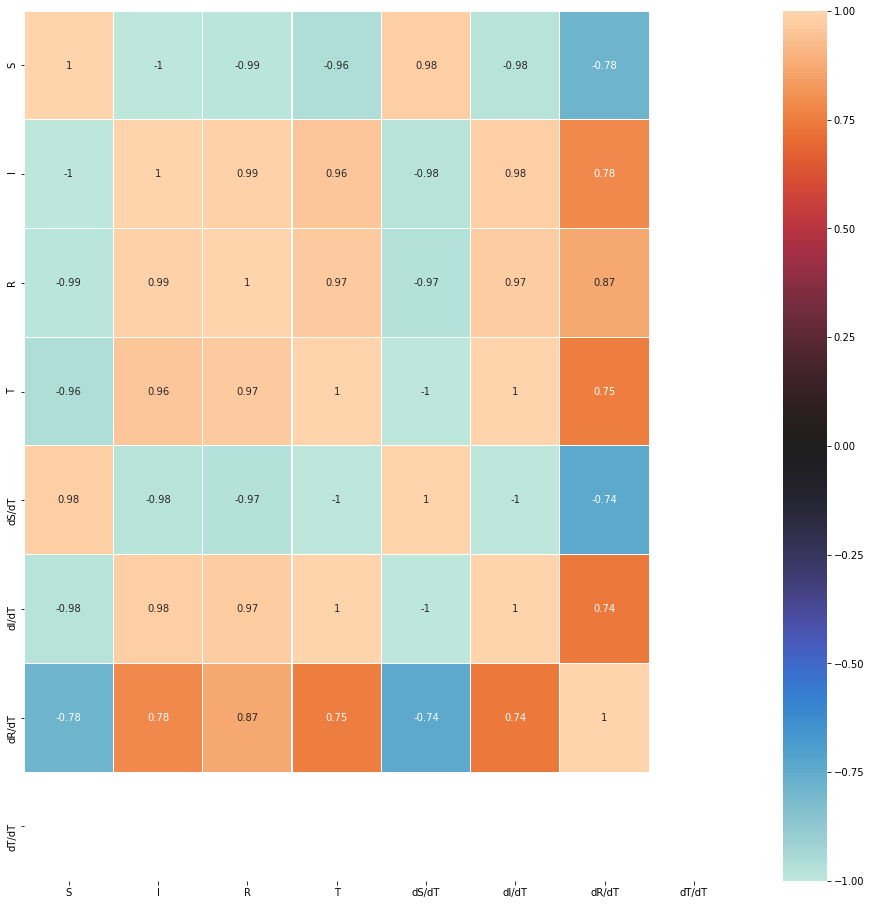

In [64]:
plt.figure(figsize = (16,16))
sns.heatmap(model_df.head().corr(),annot = True,linewidths=0.1,cmap = 'icefire')
plt.plot()

There is perfectly negative correlation between I and S.
There is high correlation between I and R which means as cases of Infection increase,the Recovered infection increase.
dS/dT(rate of change of Susceptible Cases) is negative correlated with dI/dT which means as rate of susceptible cases decreases,rate of infected cases will increase.

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=model_df['dS/dT'], x=model_df['T'],
                    mode='lines',
                    name='dS/dT'))
fig.add_trace(go.Scatter(y=model_df['dI/dT'], x=model_df['T'],
                    mode='lines',
                    name='dI/dT'))
fig.add_trace(go.Scatter(y=model_df['dR/dT'], x=model_df['T'],
                    mode='lines',
                    name='dR/dT'))

fig.update_layout(barmode='stack',title_text ='Differential Rates of Change ')
fig.layout.template ='plotly_dark'

fig.show()

In [66]:
#covid_clean.groupby(['Date','Country/Region']).sum()
china_model = covid_clean[covid_clean['country_code'] == 'CN'].groupby('Date').sum().reset_index()
china_model['nth Day'] = (china_model['Date'] - min(china_model['Date'])).apply(lambda x:str(x).split(' ')[0]).astype(int)
fig = px.line(x = china_model['Date'],y = china_model['Deaths'])
fig.update_layout(title_text ='China:Confirmed Cases Cummulative')
fig.layout.template ='plotly_dark'

fig.show()

In [67]:
a = list(china_model[china_model['Date'] == min(china_model['Date'])]['Confirmed']) 
for i in range(1,china_model.shape[0]):
     a.append(china_model['Confirmed'].iloc[i]-china_model['Confirmed'].iloc[i-1])
china_model['Day_confirmed'] = a

b = list(china_model[china_model['Date'] == min(china_model['Date'])]['Deaths']) 
for i in range(1,china_model.shape[0]):
     b.append(china_model['Deaths'].iloc[i]-china_model['Deaths'].iloc[i-1])
china_model['Day_deaths'] = b

c = list(china_model[china_model['Date'] == min(china_model['Date'])]['Recovered']) 
for i in range(1,china_model.shape[0]):
     c.append(china_model['Recovered'].iloc[i]-china_model['Recovered'].iloc[i-1])
china_model['Day_Recovered'] = c

In [68]:


fig = go.Figure()
fig.add_trace(go.Scatter(x=china_model['nth Day'], y=china_model['Day_confirmed'],
                    mode='lines',
                    name='Day confirmed'))
fig.add_trace(go.Scatter(x=china_model['nth Day'], y=china_model['Day_deaths'],
                    mode='lines',
                    name='Day deaths'))
fig.add_trace(go.Scatter(x=china_model['nth Day'], y=china_model['Day_Recovered'],
                    mode='lines',
                    name='Day Recovered'))

fig.update_layout(barmode='stack',title_text ='China cases:day wise')

fig.layout.template ='plotly_dark'

fig.show()
